In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastbook import *
from fastai.vision.widgets import *

     |████████████████████████████████| 727kB 7.7MB/s 
     |████████████████████████████████| 51kB 8.7MB/s 
     |████████████████████████████████| 1.1MB 30.0MB/s 
     |████████████████████████████████| 194kB 47.6MB/s 
     |████████████████████████████████| 61kB 10.3MB/s 
Mounted at /content/gdrive


In [ ]:
lung_types = 'NORMAL','VIRUS','BACTERIA'
path = Path('/content/gdrive/My Drive/ReplicateFiles/train')

In [ ]:
lungs = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms = Resize(128)
)

dls = lungs.dataloaders(path)

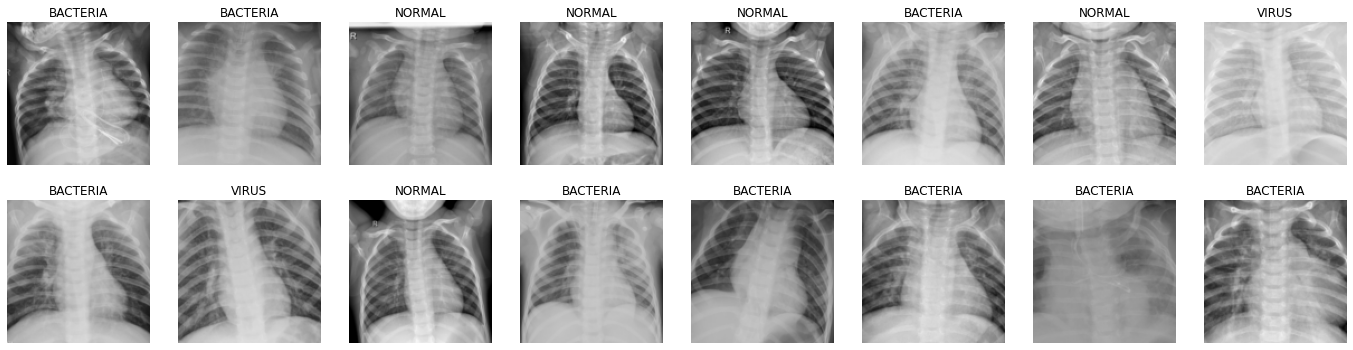

In [ ]:
dls.valid.show_batch(max_n=16, nrows=2)

In [ ]:
learn = cnn_learner(dls, resnet50, metrics=accuracy)
learn.fine_tune(25)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


epoch,train_loss,valid_loss,accuracy,time
0,1.158472,0.752677,0.748802,16:08


epoch,train_loss,valid_loss,accuracy,time
0,0.679079,0.541969,0.782359,01:13
1,0.550665,0.511106,0.795781,01:13
2,0.477590,0.492089,0.813998,01:13
3,0.418930,0.482121,0.807287,01:13
4,0.380552,0.462814,0.801534,01:14
5,0.343357,0.485097,0.809204,01:13
6,0.306926,0.522373,0.798658,01:13
7,0.266500,0.487161,0.816874,01:13
8,0.221971,0.483838,0.826462,01:14
9,0.188695,0.514688,0.816874,01:14


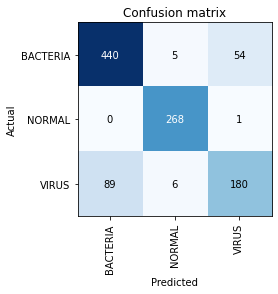

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

This is to export and test/use the model:

In [ ]:
learn.export()

In [ ]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [ ]:
learn_inf = load_learner(path/'export.pkl')

In [ ]:
learn_inf.predict('/content/gdrive/MyDrive/ReplicateFiles/test/PNEUMONIA/person100_bacteria_481.jpeg')


('BACTERIA', tensor(0), tensor([1.0000e+00, 7.8890e-08, 4.6365e-07]))